In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'C:\Users\shkatta\Downloads\downloaded\train.xlsx')
df_test=pd.read_excel(r'C:\Users\shkatta\Downloads\downloaded\test.xlsx')

In [37]:
print('train data',df.shape)
print('test data', df_test.shape)

train data (5972, 8)
test data (1282, 7)


In [3]:
for r in range(df.shape[0]):
    if df.loc[r,'First RDD']==0:
         df.loc[r,'RDD YW']=0
    else:
        df.loc[r,'RDD YW']=df.loc[r,'First RDD'].strftime('%Y-%V')

In [4]:
df.head()

,Sold To Party,Material,Order Quantity (EA),Plant,First RDD,Net Value,RDD YYYY-MM,RDD YW
0,1001024881,363083,2000,1100,2020-02-06,474.54,2020-02,2020-06
1,1001024881,363083,7000,1100,2020-02-06,1310.89,2020-02,2020-06
2,1001024881,364815,45000,1215,2020-01-09,2317.95,2020-01,2020-02
3,1001024881,363083,10000,1100,2020-02-05,1872.70,2020-02,2020-06
4,1001024881,366408,1000,1215,2020-01-09,167.59,2020-01,2020-02


In [5]:
df.isnull().any()

Sold To Party          False
Material               False
Order Quantity (EA)    False
Plant                  False
First RDD              False
Net Value              False
RDD YYYY-MM            False
RDD YW                 False
dtype: bool

In [6]:
df_test.isnull().any()

Sold To Party          False
Material               False
Order Quantity (EA)    False
Plant                  False
First RDD              False
Net Value              False
RDD YYYY-MM            False
dtype: bool

In [8]:
temp=df[(df['Sold To Party']==1001016461) & (df['Material']==221261)]
t1=temp[['RDD YW', 'Order Quantity (EA)']]
t1.sort_values(by='RDD YW', inplace=True)
t1.reset_index(inplace=True, drop=True)
t1=t1.groupby(by='RDD YW').sum()
t1.reset_index(inplace=True)
for r in range(0,t1.shape[0]):
  t1.loc[r,'RDD YW']=datetime.strptime(t1.loc[r,'RDD YW'] + '-1', "%Y-%W-%w")
t1.set_index('RDD YW', inplace=True)
t1.head()

,Order Quantity (EA)
RDD YW,
2020-01-13,5600
2020-01-20,15500
2020-01-27,2300
2020-02-03,11300
2020-02-10,7000


<AxesSubplot:xlabel='RDD YW', ylabel='Order Quantity (EA)'>

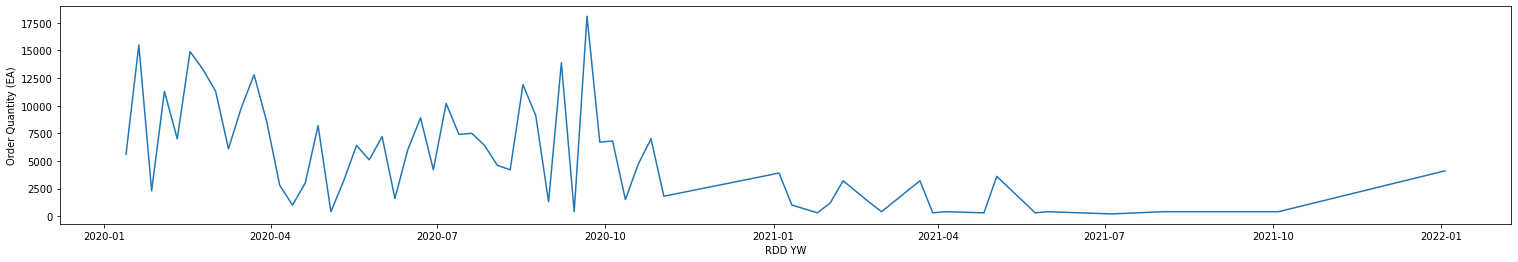

In [9]:
fig_dims = (26, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='RDD YW', y='Order Quantity (EA)',ax=ax,data=t1)

## check stationarity in data

In [38]:
t1.shape

(62, 1)

###  checking using rolling mean

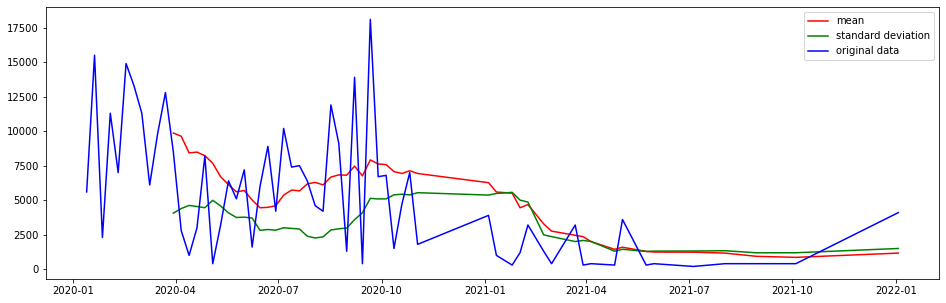

In [11]:
mean=t1.rolling(12).mean()
std=t1.rolling(12).std()
plt.figure(figsize=(16,5))
plt.plot(mean,color='red',label='mean')
plt.plot(std,color='green',label='standard deviation')
plt.plot(t1,color='blue',label='original data')
plt.legend(loc='best')
plt.show(block=False)

### checking using ADF Test

In [12]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(t1['Order Quantity (EA)'])
print(result)
labels = ['ADF Test Statistic(critical value)','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(result,labels):
  print(label+' : '+str(value))
if result[1] <= 0.05:
    print('stationary')
else:
    print('non-stationary')

(-2.8921224450279164, 0.04627174858949377, 1, 60, {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}, 965.3644619630443)
ADF Test Statistic(critical value) : -2.8921224450279164
p-value : 0.04627174858949377
#Lags Used : 1
Number of Observations Used : 60
stationary


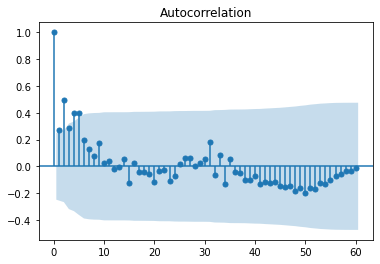

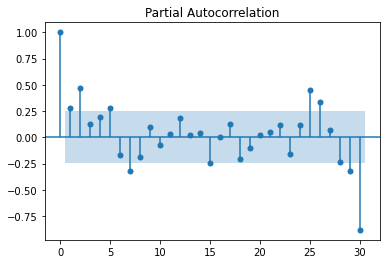

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


#fig, ax = plt.subplots(figsize=(10,5))
sm.graphics.tsa.plot_acf(t1['Order Quantity (EA)'], lags=60)
sm.graphics.tsa.plot_pacf(t1['Order Quantity (EA)'], lags=30)
plt.show()

In [93]:
train_1=t1['Order Quantity (EA)'][:45]
test_1=t1['Order Quantity (EA)'][45:]
test_1.head()

RDD YW
2021-01-25     300
2021-02-01    1200
2021-02-08    3200
2021-02-22    1300
2021-03-01     400
Name: Order Quantity (EA), dtype: int64

In [94]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_1,order=(4,1,0))
model_fit=model.fit(disp=0)

In [95]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D.Order Quantity (EA)   No. Observations:                   44
Model:                    ARIMA(4, 1, 0)   Log Likelihood                -428.112
Method:                          css-mle   S.D. of innovations           3996.004
Date:                   Tue, 06 Apr 2021   AIC                            868.225
Time:                           13:27:55   BIC                            878.930
Sample:                                1   HQIC                           872.195
                                                                                 
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        -136.2836    174.789     -0.780      0.436    -478.864     206.297
ar.L1.D.Order Quantity (EA)    -1.0012      0.138     -7.266      0.000      -1.271      -0.731
ar.L2.D.Order Quantity (EA)    -0.6030      0.185     -3.256      0.001      -0.966      -0.240
ar.L3.D.Order Quantity (EA)    -0.5991      0.181     -3.303      0.001      -0.955      -0.244
ar.L4.D.Order Quantity (EA)    -0.3727      0.140     -2.662      0.008      -0.647      -0.098
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3571           -1.2361j            1.2867           -0.2052
AR.2            0.3571           +1.2361j            1.2867            0.2052
AR.3           -1.1609           -0.5225j            1.2730           -0.4327
AR.4           -1.1609           +0.5225j            1.2730            0.4327
-----------------------------------------------------------------------------
"""

In [96]:
start = len(train_1)
print(start)
end = len(train_1) + len(test_1) - 1
predictions =model_fit.predict(start, end,
                             typ = 'levels').rename("Predictions")
predictions=predictions.cumsum()
predictions.head

45


44    4408.131065
45    2937.140952
46    2822.370278
47    2375.809213
48    2015.801435
Name: Predictions, dtype: float64

In [78]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test_1, predictions))

# Calculate mean squared error
mean_squared_error(test_1, predictions)


1751.4402097075429


3067542.8081804016

In [70]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(train_1, start_p=0, start_q=0,
                           max_p=7, max_q=8, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=899.696, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=879.792, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=897.719, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=878.320, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=877.500, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=874.088, Time=0.10 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=875.620, Time=2.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=875.789, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=877.421, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=877.333, Time=0.28 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=872.055, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=875.457, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=873.152, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=873.711, 

## Transformations to convert the non-stationary data to stationary

In [13]:

log_data=np.log(t1)
log_data.head()

,Order Quantity (EA)
RDD YW,
2020-01-13,8.630522
2020-01-20,9.648595
2020-01-27,7.740664
2020-02-03,9.332558
2020-02-10,8.853665


### Rolling

#### What are rolling window calculations, and why do we care?

Rolling calculations simply apply functions to a fixed width subset of this data (aka a window), indexing one observation each calculation. There are a few common reasons  you may want to use a rolling calculation in time series analysis:

- Measuring the central tendency over time (mean, median)
- Measuring the volatility over time (sd, var)
- Detecting changes in trend (fast vs slow moving averages)
- Measuring a relationship between two time series over time (cor, cov)

A moving average allows us to visualize how an average changes over time, which is very useful in cutting through the noise to detect a trend in a time series dataset.
 In time series analysis, nothing is static. A correlation may exist for a subset of time or an average may vary from one day to the next. 
 
- rolling(4) means we are taking the mean of the last four entries at that particular point of time. same with std

- For a series to be constant mean and std should be constant over time

In [14]:
log_mean=log_data.rolling(12).mean()
log_std=log_data.rolling(12).std()

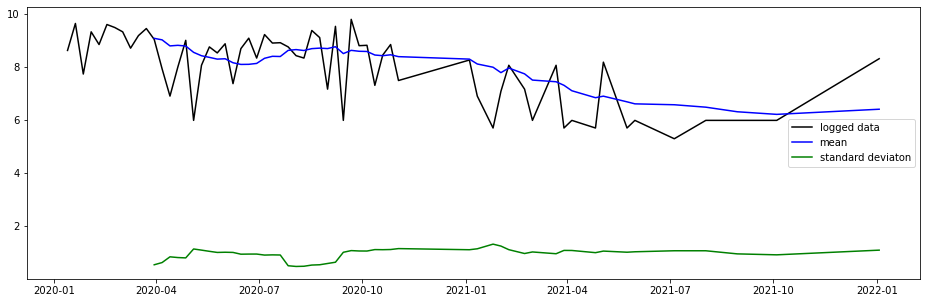

In [15]:
plt.figure(figsize=(16,5))
plt.plot(log_data,color='black',label='logged data')
plt.plot(log_mean,color='blue',label='mean')
plt.plot(log_std,color='green',label='standard deviaton')
plt.legend(loc='best')

In [16]:
result=adfuller(log_data['Order Quantity (EA)'])
print(result)
labels = ['ADF Test Statistic(critical value)','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(result,labels):
  print(label+' : '+str(value))
if result[1] <= 0.05:
    print('stationary')
else:
    print('non-stationary')

(-1.2647469785666268, 0.6451424009821273, 3, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 156.79565855183944)
ADF Test Statistic(critical value) : -1.2647469785666268
p-value : 0.6451424009821273
#Lags Used : 3
Number of Observations Used : 58
non-stationary


#### How to Decompose Time Series Data into Trend and Seasonality
Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

Think of the time series ytyt as consisting of three components: a seasonal component, a trend-cycle component (containing both trend and cycle), and a remainder component (containing anything else in the time series).

- Additive model
- Multiplicative model

The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series.

When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.
- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

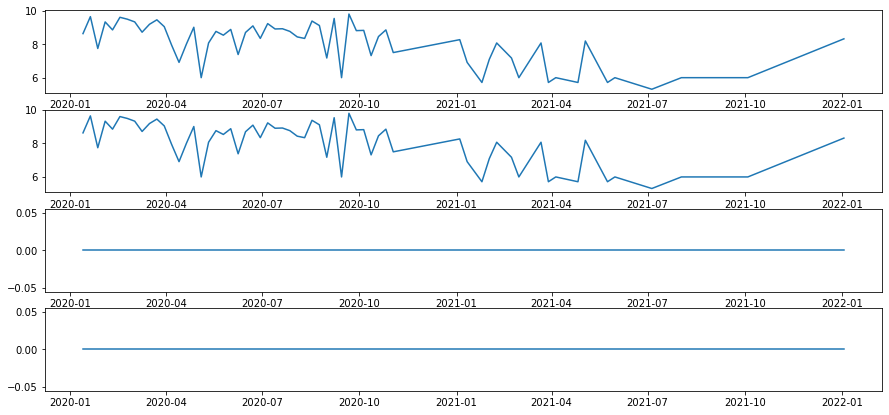

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
series =log_data.copy()
result = seasonal_decompose(series, freq=1,model='additive')
trend=result.trend
seasonal=result.seasonal
resid=result.resid
#print(result.observed)
plt.figure(figsize=(15,7))
plt.subplot(411)
plt.plot(log_data,label='orginal')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.subplot(414)
plt.plot(resid,label='resid')

### Differencing time series

In [17]:
##differencing using log values

In [18]:
log_diff=log_data-log_data.shift(1)
log_diff_mean=log_diff.rolling(12).mean()
log_diff_std=log_diff.rolling(12).std()

In [19]:
result=adfuller(log_diff['Order Quantity (EA)'][1:])
print(result)
labels = ['ADF Test Statistic(critical value)','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(result,labels):
  print(label+' : '+str(value))
if result[1] <= 0.05:
    print('stationary')
else:
    print('non-stationary')

(-7.683350883765645, 1.483719504985706e-11, 2, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 154.5289385448151)
ADF Test Statistic(critical value) : -7.683350883765645
p-value : 1.483719504985706e-11
#Lags Used : 2
Number of Observations Used : 58
stationary


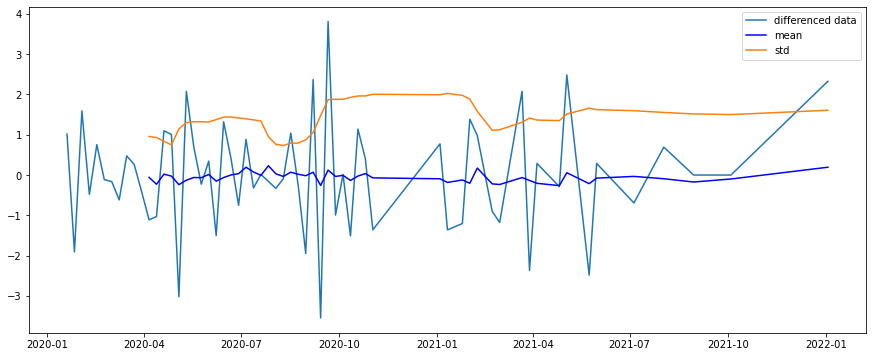

In [20]:
plt.figure(figsize=(15,6))
plt.plot(log_diff,label='differenced data')
plt.plot(log_diff_mean,label='mean',color='blue')
plt.plot(log_diff_std,label='std')
plt.legend(loc='best')

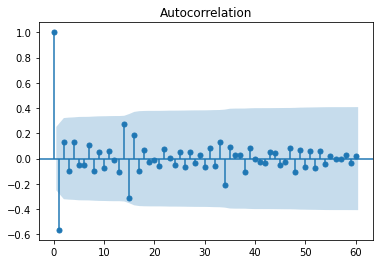

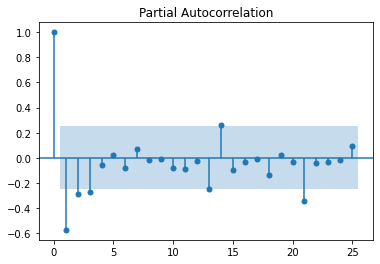

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


#fig, ax = plt.subplots(figsize=(10,5))
sm.graphics.tsa.plot_acf(log_diff['Order Quantity (EA)'][1:], lags=60)
sm.graphics.tsa.plot_pacf(log_diff['Order Quantity (EA)'][1:], lags=25)
plt.show()

In [21]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(log_data['Order Quantity (EA)'][1:],order=(1,1,0))
model_fit=model.fit()

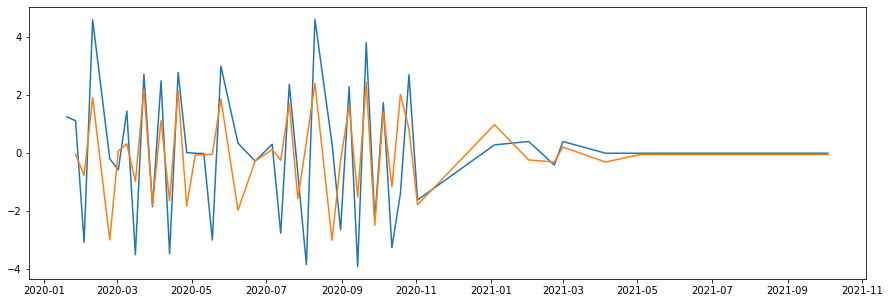

In [30]:
plt.figure(figsize=(15,5))
plt.plot(log_diff['Order Quantity (EA)'][1:])
plt.plot(model_fit.fittedvalues)

In [23]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

RDD YW
2020-01-27   -0.027800
2020-02-03   -0.762919
2020-02-10    1.915732
2020-02-24   -2.986298
2020-03-02    0.074202
dtype: float64


In [29]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

RDD YW
2020-01-27   -0.027800
2020-02-03   -0.790719
2020-02-10    1.125013
2020-02-24   -1.861284
2020-03-02   -1.787083
dtype: float64


In [25]:
log_pred=pd.Series(log_data.iloc[0],index=log_data.index)
log_pred=log_pred.add(predictions_ARIMA_diff_cumsum,fill_value=0)
log_pred.head()

RDD YW
2020-01-13         NaN
2020-01-20         NaN
2020-01-27   -0.027800
2020-02-03   -0.790719
2020-02-10    1.125013
dtype: float64

In [26]:
predictions_ARIMA = np.exp(log_pred)

In [32]:
np.exp(6.)

403.4287934927351

In [27]:
predictions_ARIMA.head()

RDD YW
2020-01-13         NaN
2020-01-20         NaN
2020-01-27    0.972583
2020-02-03    0.453519
2020-02-10    3.080258
dtype: float64

In [28]:
predictions_ARIMA

RDD YW
2020-01-13         NaN
2020-01-20         NaN
2020-01-27    0.972583
2020-02-03    0.453519
2020-02-10    3.080258
2020-02-24    0.155473
2020-03-02    0.167448
2020-03-09    0.230816
2020-03-16    0.087205
2020-03-23    0.780162
2020-03-30    0.131066
2020-04-06    0.405158
2020-04-13    0.078626
2020-04-20    0.687348
2020-04-27    0.110789
2020-05-04    0.104360
2020-05-11    0.099711
2020-05-18    0.095944
2020-05-25    0.622204
2020-06-08    0.087277
2020-06-22    0.066646
2020-07-06    0.075720
2020-07-13    0.059374
2020-07-20    0.329919
2020-07-27    0.069007
2020-08-03    0.101631
2020-08-10    1.130264
2020-08-24    0.056506
2020-08-31    0.043818
2020-09-07    0.226224
2020-09-14    0.049920
2020-09-21    0.577810
2020-09-28    0.048263
2020-10-05    0.201663
2020-10-12    0.063176
2020-10-19    0.481526
2020-10-26    1.116107
2020-11-02    0.188833
2021-01-04    0.504796
2021-02-01    0.401287
2021-02-22    0.295866
2021-03-01    0.366330
2021-04-05    0.270092
2021

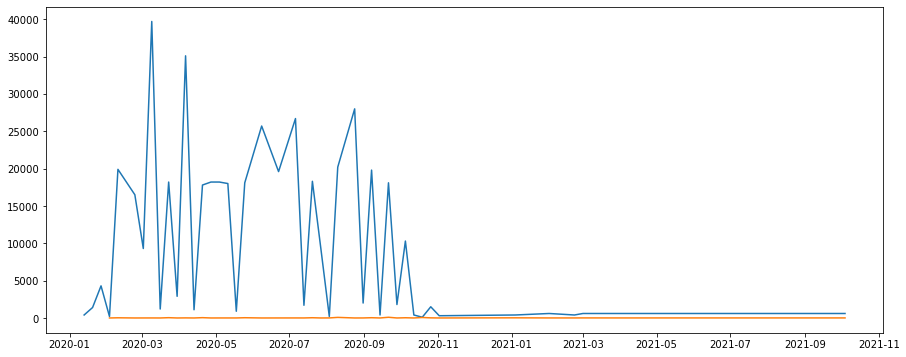

In [71]:
plt.figure(figsize=(15,6))
plt.plot(t1)
plt.plot(predictions_ARIMA)

In [105]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D.Order Quantity (EA)   No. Observations:                   47
Model:                    ARIMA(1, 1, 0)   Log Likelihood                 -90.789
Method:                          css-mle   S.D. of innovations              1.661
Date:                   Mon, 05 Apr 2021   AIC                            187.578
Time:                           16:40:17   BIC                            193.129
Sample:                                1   HQIC                           189.667
                                                                                 
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0278      0.149     -0.187      0.852      -0.320       0.264
ar.L1.D.Order Quantity (EA)    -0.6393      0.108     -5.893      0.000      -0.852      -0.427
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5643           +0.0000j            1.5643            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
#differencing with normal values without any initial transformations done on the data.

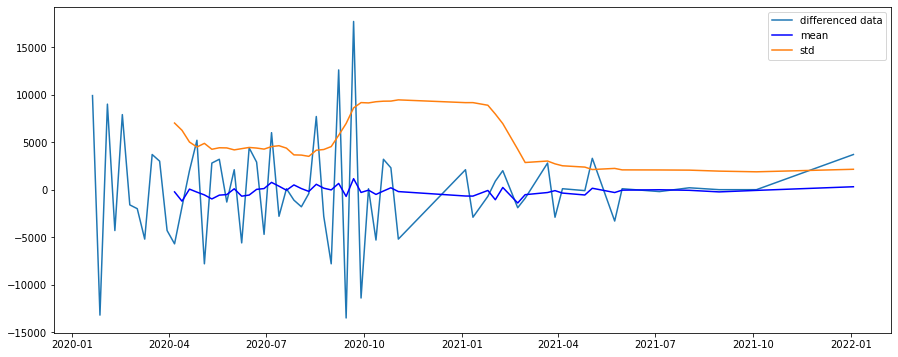

In [26]:
simple_diff=t1-t1.shift(1)
simple_diff_mean=simple_diff.rolling(12).mean()
simple_diff_std=simple_diff.rolling(12).std()
plt.figure(figsize=(15,6))
plt.plot(simple_diff,label='differenced data')
plt.plot(simple_diff_mean,label='mean',color='blue')
plt.plot(simple_diff_std,label='std')
plt.legend(loc='best')

In [28]:
result=adfuller(simple_diff['Order Quantity (EA)'][1:])
print(result)
labels = ['ADF Test Statistic(critical value)','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(result,labels):
  print(label+' : '+str(value))
if result[1] <= 0.05:
    print('stationary')
else:
    print('non-stationary')

(-7.284527819479896, 1.4706441066456327e-10, 3, 57, {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}, 944.1694909823017)
ADF Test Statistic(critical value) : -7.284527819479896
p-value : 1.4706441066456327e-10
#Lags Used : 3
Number of Observations Used : 57
stationary


In [30]:
simple_diff.head()

,Order Quantity (EA)
RDD YW,
2020-01-13,NaN
2020-01-20,9900.0
2020-01-27,-13200.0
2020-02-03,9000.0
2020-02-10,-4300.0


### ACF (Auto Corelation Function) and (Partial Auto Corelation Function)

What is ACF ?

For Instance today stock price we predicted based on yesterday stock price the ACF will tell how much strongly they are corelated, If todays value is depended on day before yesterday than ACF will tell how strong they are and how many days required to predict the todays value.

What is PACF?

If we want to calculate the corelation between today and yesterday we have to take the corelation of day before yesterday because todays value depends upon the yesterday time spot. So this is the reason we use PACF.


<b>The lines which crosses the blue dotted lines in PACF and ACF those lines are considered to be that many days are required to predict the todays value</b>

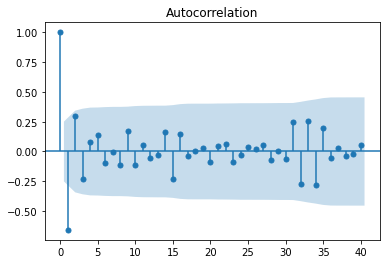

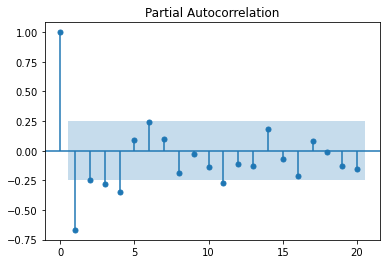

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


#fig, ax = plt.subplots(figsize=(10,5))
sm.graphics.tsa.plot_acf(simple_diff['Order Quantity (EA)'][1:], lags=40)
sm.graphics.tsa.plot_pacf(simple_diff['Order Quantity (EA)'][1:], lags=20)
plt.show()

In [29]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(diff['Order Quantity (EA)'][1:],order=(2,1,0))
model_fit=model.fit()

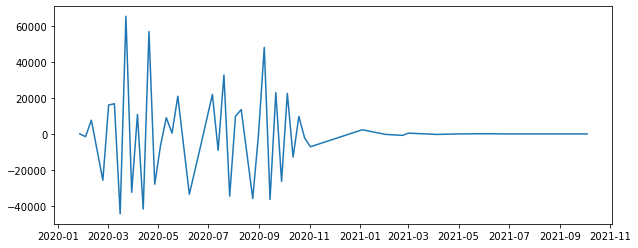

In [34]:
plt.figure(figsize=(10,4))
plt.plot(model_fit.fittedvalues)

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D.Order Quantity (EA)   No. Observations:                   47
Model:                    ARIMA(2, 1, 0)   Log Likelihood                -513.814
Method:                          css-mle   S.D. of innovations          13294.061
Date:                   Mon, 05 Apr 2021   AIC                           1035.629
Time:                           15:40:20   BIC                           1043.029
Sample:                                1   HQIC                          1038.414
                                                                                 
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -19.3420    715.558     -0.027      0.978   -1421.809    1383.125
ar.L1.D.Order Quantity (EA)    -1.2352      0.120    -10.328      0.000      -1.470      -1.001
ar.L2.D.Order Quantity (EA)    -0.5238      0.118     -4.424      0.000      -0.756      -0.292
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1791           -0.7203j            1.3817           -0.4127
AR.2           -1.1791           +0.7203j            1.3817            0.4127
-----------------------------------------------------------------------------
"""

In [36]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

RDD YW
2020-01-27      -19.341978
2020-02-03    -1575.207009
2020-02-10     7597.961367
2020-02-24   -25785.028940
2020-03-02    16014.066569
dtype: float64


<AxesSubplot:xlabel='RDD YW'>

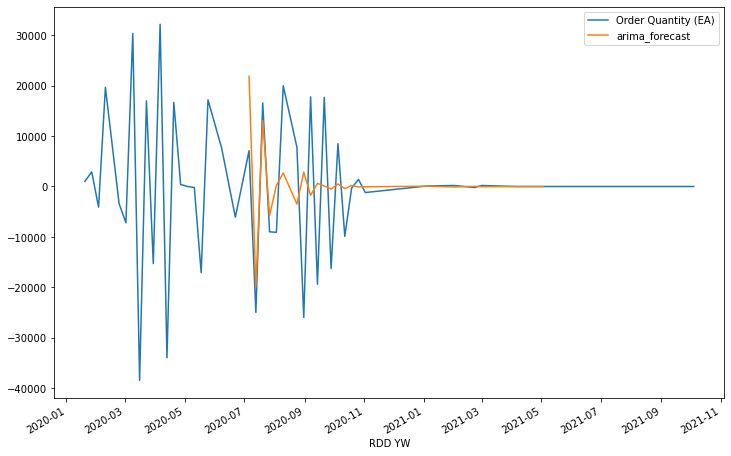

In [26]:
diff['arima_forecast']=model_fit.predict(start=20,end=42,dynamic=True)
diff[['Order Quantity (EA)','arima_forecast']].plot(figsize=(12,8))

In [28]:
from scipy import stats
from scipy.stats import normaltest

resid = model.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

AttributeError: 'ARIMA' object has no attribute 'resid'

In [27]:
cum=diff.cumsum(
)

In [180]:
def arima_test(data,customer,material):
    temp=df[(df['Sold To Party']==customer) & (df['Material']==material)]
    for r in range(df.shape[0]):
        if df.loc[r,'First RDD']==0:
            df.loc[r,'RDD YW']=0
        else:
            df.loc[r,'RDD YW']=df.loc[r,'First RDD'].strftime('%Y-%V')
    print('combination of customer no {} and  Material {}'.format(customer,material))
    if temp.shape[0]<=3:
        print('we are skipping this combination, since there is no data provided for this combination.')
        pass
    else:    
        print('no of samples present for this combination is : {}'.format(temp.shape[0]))
        t1=temp[['RDD YW', 'Order Quantity (EA)']]
        t1.sort_values(by='RDD YW', inplace=True)
        t1.reset_index(inplace=True, drop=True)
        t1=t1.groupby(by='RDD YW').sum()
        t1.reset_index(inplace=True)
        for r in range(0,t1.shape[0]):
            t1.loc[r,'RDD YW']=datetime.strptime(t1.loc[r,'RDD YW'] + '-1', "%Y-%W-%w")
        t1.set_index('RDD YW', inplace=True)
    
        first=t1['Order Quantity (EA)']-t1['Order Quantity (EA)'].shift(1)
        return first

In [182]:
result=arima_test(df_test,1001016461,292335)

combination of customer no 1001016461 and  Material 292335
no of samples present for this combination is : 134
